In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


import warnings
warnings.simplefilter("ignore")

In [2]:
df_train=pd.read_csv("D:\\ExcelR Data Science\\Assignments\\Naive Bayes\\SalaryData_Train.csv")
df_test=pd.read_csv("D:\\ExcelR Data Science\\Assignments\\Naive Bayes\\SalaryData_Test.csv")

In [3]:
print("Train_data:",df_train.shape)
print("Test_data:",df_test.shape)

Train_data: (30161, 14)
Test_data: (15060, 14)


In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
df_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

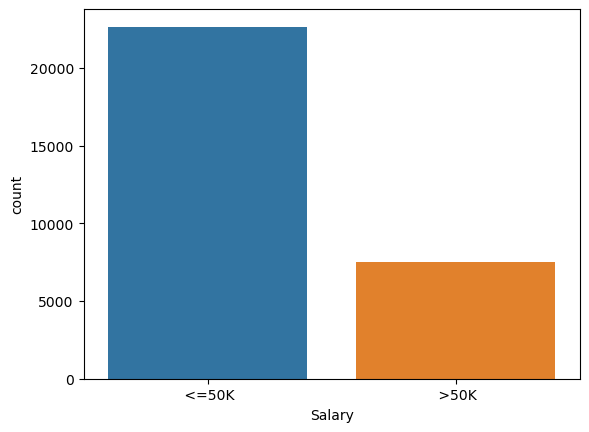

In [9]:
# Count of target field

sns.countplot(df_train['Salary'])


Text(0.5, 1.0, 'Salary VC Workclass')

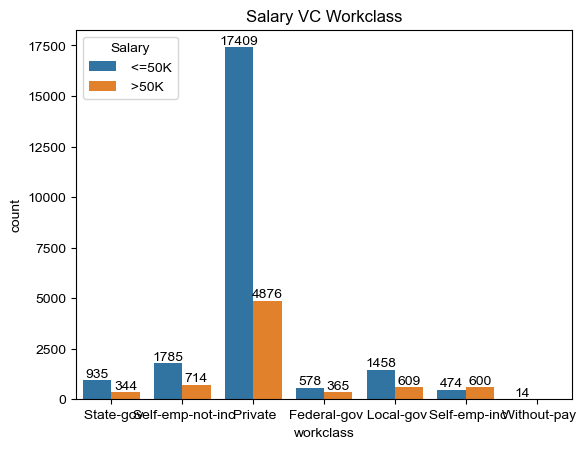

In [10]:
# Salary Vs Workclass
ax=sns.countplot(x=df_train['workclass'],hue=df_train['Salary'],data=df_train)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(8,12)})
plt.title("Salary VC Workclass")

Text(0.5, 1.0, 'Salary VC maritalstatus')

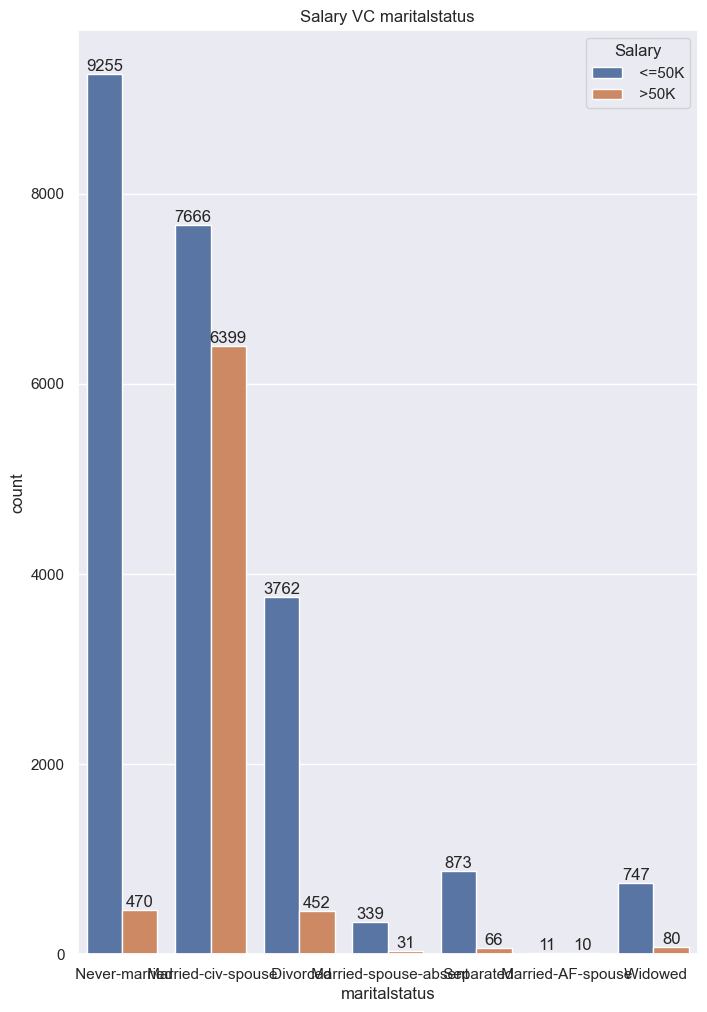

In [11]:
ax=sns.countplot(x=df_train['maritalstatus'],hue=df_train['Salary'],data=df_train)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(10,15)})
plt.title("Salary VC maritalstatus")

Text(0.5, 1.0, 'Salary VC Gender')

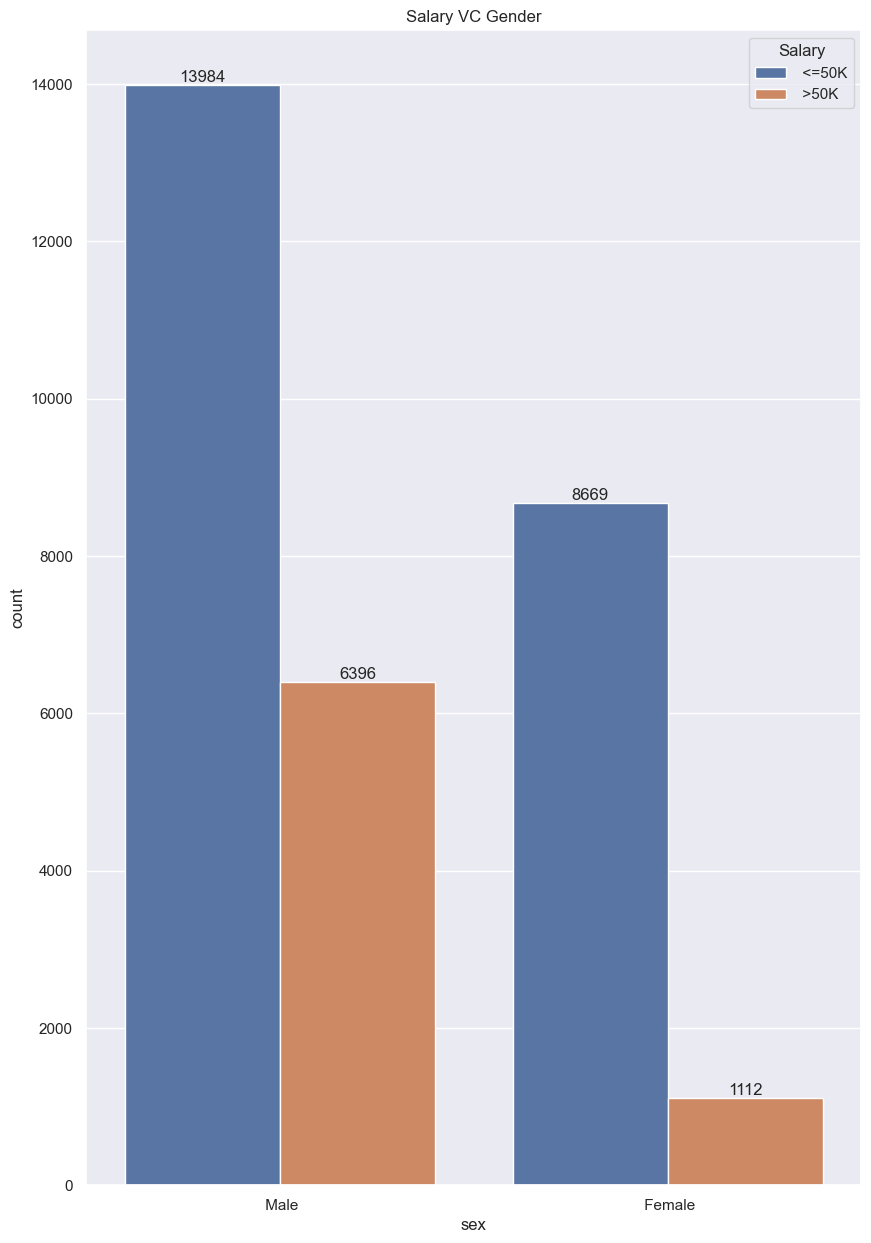

In [12]:
ax=sns.countplot(x=df_train['sex'],hue=df_train['Salary'],data=df_train)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(10,15)})
plt.title("Salary VC Gender")

In [13]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [15]:
df_train['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [16]:
# Education and Educationno are correlated which means educationo is labelencoded field of education so we can drop
df_train=df_train.drop('education',axis=1)

In [17]:
df_test=df_test.drop('education',axis=1)

In [18]:
df_train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [19]:
df_train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [20]:
df_train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [21]:
df_train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [22]:
df_train.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [23]:
#encoding train and test categorical values with LabelEncoder

le=LabelEncoder()
df_train['workclass']=le.fit_transform(df_train['workclass'])
df_train['maritalstatus']=le.fit_transform(df_train['maritalstatus'])
df_train['occupation']=le.fit_transform(df_train['occupation'])
df_train['relationship']=le.fit_transform(df_train['relationship'])
df_train['race']=le.fit_transform(df_train['race'])
df_train['sex']=le.fit_transform(df_train['sex'])
df_train['native']=le.fit_transform(df_train['native'])
df_train['Salary']=le.fit_transform(df_train['Salary'])


df_test['workclass']=le.fit_transform(df_test['workclass'])
df_test['maritalstatus']=le.fit_transform(df_test['maritalstatus'])
df_test['occupation']=le.fit_transform(df_test['occupation'])
df_test['relationship']=le.fit_transform(df_test['relationship'])
df_test['race']=le.fit_transform(df_test['race'])
df_test['sex']=le.fit_transform(df_test['sex'])
df_test['native']=le.fit_transform(df_test['native'])
df_test['Salary']=le.fit_transform(df_test['Salary'])




In [24]:
df_train.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


In [25]:
df_test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0


In [26]:
x_train=df_train.drop('Salary',axis=1)
y_train=df_train['Salary']

In [27]:
x_test=df_test.drop('Salary',axis=1)
y_test=df_test['Salary']

In [28]:
# normalizing the data
sd=StandardScaler()
x_train=sd.fit_transform(x_train)


In [29]:
x_test=sd.fit_transform(x_test)

In [30]:

from sklearn.svm import SVC
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(x_train, y_train)
svc_pred=svc_model.predict(x_test)

print("ClassificationReport:\n",classification_report(svc_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(svc_pred,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(svc_pred,y_test)))


ClassificationReport:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     13550
           1       0.32      0.77      0.45      1510

    accuracy                           0.81     15060
   macro avg       0.64      0.79      0.67     15060
weighted avg       0.90      0.81      0.84     15060

ConfusionMatrix:
 [[11020  2530]
 [  340  1170]]
Accuracy:
 0.81%


In [31]:
#RBF Kernel in SVM
svc_model_rbf = SVC(C=.1, kernel='rbf')
svc_model_rbf.fit(x_train, y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test)

print("ClassificationReport:\n",classification_report(svc_pred_rbf,y_test))
print("ConfusionMatrix:\n",confusion_matrix(svc_pred_rbf,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(svc_pred_rbf,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     12722
           1       0.49      0.77      0.59      2338

    accuracy                           0.84     15060
   macro avg       0.72      0.81      0.75     15060
weighted avg       0.88      0.84      0.85     15060

ConfusionMatrix:
 [[10818  1904]
 [  542  1796]]
Accuracy:
 0.84%


In [33]:
#Polynomial Kernel in SVM
svc_model_poly = SVC(C=.1, kernel='poly')
svc_model_poly.fit(x_train, y_train)
svc_pred_poly=svc_model_rbf.predict(x_test)

print("ClassificationReport:\n",classification_report(svc_pred_poly,y_test))
print("ConfusionMatrix:\n",confusion_matrix(svc_pred_poly,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(svc_pred_poly,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     12722
           1       0.49      0.77      0.59      2338

    accuracy                           0.84     15060
   macro avg       0.72      0.81      0.75     15060
weighted avg       0.88      0.84      0.85     15060

ConfusionMatrix:
 [[10818  1904]
 [  542  1796]]
Accuracy:
 0.84%


In [34]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [35]:
gnb_pred=gnb.predict(x_test)

In [36]:
#Evaluation
print("ClassificationReport:\n",classification_report(gnb_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(gnb_pred,y_test))
print("Accuracy:\n","{:.2f}%".format(accuracy_score(gnb_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88     13304
           1       0.32      0.68      0.44      1756

    accuracy                           0.80     15060
   macro avg       0.64      0.75      0.66     15060
weighted avg       0.88      0.80      0.82     15060

ConfusionMatrix:
 [[10799  2505]
 [  561  1195]]
Accuracy:
 0.80%


In [37]:
# Comparing with other classification models

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print("ClassificationReport:\n",classification_report(lr_pred,y_test))
print("ConfusionMatrix:\n",confusion_matrix(lr_pred,y_test))
print("Accuracy:","{:.2f}%".format(accuracy_score(lr_pred,y_test)))

ClassificationReport:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     12681
           1       0.46      0.71      0.55      2379

    accuracy                           0.82     15060
   macro avg       0.70      0.77      0.72     15060
weighted avg       0.86      0.82      0.83     15060

ConfusionMatrix:
 [[10666  2015]
 [  694  1685]]
Accuracy: 0.82%


In [38]:
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)
ds_pred=ds.predict(x_test)

print('Classification Report:\n',classification_report(y_test,ds_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,ds_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(ds_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     11360
           1       0.61      0.59      0.60      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.73      0.74     15060
weighted avg       0.80      0.81      0.80     15060

Confusion Matrix:
 [[9932 1428]
 [1500 2200]]
Accuracy: 0.81%


In [39]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

print('Classification Report:\n',classification_report(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(rf_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.71      0.61      0.65      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.76      0.77     15060
weighted avg       0.84      0.84      0.84     15060

Confusion Matrix:
 [[10422   938]
 [ 1456  2244]]
Accuracy: 0.84%


In [40]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

print('Classification Report:\n',classification_report(y_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,knn_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(knn_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     11360
           1       0.67      0.59      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.77      0.75      0.76     15060
weighted avg       0.82      0.83      0.82     15060

Confusion Matrix:
 [[10270  1090]
 [ 1502  2198]]
Accuracy: 0.83%


In [41]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg_pred=xg.predict(x_test)

print('Classification Report:\n',classification_report(y_test,xg_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,xg_pred))
print("Accuracy:","{:.2f}%".format(accuracy_score(xg_pred,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     11360
           1       0.75      0.62      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.82      0.78      0.79     15060
weighted avg       0.85      0.86      0.85     15060

Confusion Matrix:
 [[10581   779]
 [ 1388  2312]]
Accuracy: 0.86%


In [42]:
model=['Logistic','NaiveBayes','DecisiionTree','RandomForest','KNNClassifier','XGBOOST','Support Vector Machine_Linear Kernal',
      'Support Vector Machine_RBF Kernal','Support Vector Machine_Polynomial Kernal']
accuracy=[accuracy_score(y_test,lr_pred),accuracy_score(gnb_pred,y_test),accuracy_score(y_test,ds_pred),
          accuracy_score(y_test,rf_pred),accuracy_score(y_test,knn_pred),accuracy_score(xg_pred,y_test),
          accuracy_score(svc_pred,y_test),accuracy_score(svc_pred_rbf,y_test),accuracy_score(svc_pred_poly,y_test)]
acc=pd.DataFrame({'MLModel':model,
                 'Accuracy':accuracy})

In [44]:
acc.sort_values('Accuracy',ascending=False)

,MLModel,Accuracy
5,XGBOOST,0.856109
3,RandomForest,0.841036
7,Support Vector Machine_RBF Kernal,0.837583
8,Support Vector Machine_Polynomial Kernal,0.837583
4,KNNClassifier,0.827888
0,Logistic,0.820120
6,Support Vector Machine_Linear Kernal,0.809429
2,DecisiionTree,0.805578
1,NaiveBayes,0.796414
